# Worshop 1 - Image manipulation and visualization

_Author: Nicola Romanò - [nicola.romano@ed.ac.uk](mailto:nicola.romano@ed.ac.uk)_

## Introduction

This first workshop will allow you to practice what you learned in Lectures 1 and 2, related to basic image manipulation and visualization.

All workshops in the course are in the form of Jupyter notebooks, so that you can easily write, test and modify the code as you read through the document.

In this notebook we are going to apply some of the knowledge from the lectures about preprocessing.


## Learning objectives

At the end of this workshop you should be able to:
- Open and visualize images using Python and colourmap them
- Crop images
- Apply affine transformations to images
- Save modified images
- Visualize videos/3D stacks/multidimensional images

## Images as matrices

In lecture 1 we learnt how we can use matrices (or tensors, that is multi-dimensional matrices) to represent an image.

We also introduced the [Numpy library](https://numpy.org/) as a great way to deal with matrix manipulations.
In this first exercise we will use numpy to create a few images.

Let's start by using the `zeros` function from `numpy` to create a 100x100 matrix of zeros. We specify a uint8 (unsigned integer, 8 bit) data type, so that our values are interpreted as 8 bit integers, between 0 and 255. If we did not specify that, numpy would consider our data as real numbers (float).

In [1]:
import numpy as np
img = np.zeros(shape = (100,100), dtype=np.uint8)

We can now visualize the image we just created using the `imshow` function from `matplotlib`.

Use what you learnt in the lectures to visualize the image using Matplotlib

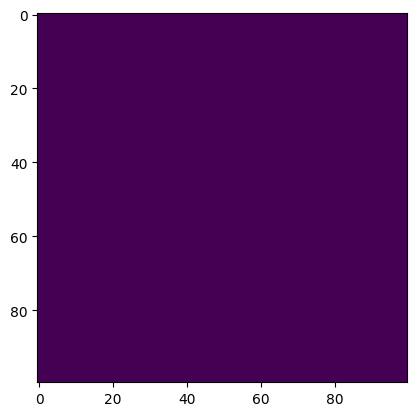

In [2]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

If all is correct, you should see a 100x100 dark purple square.

**Why is it not black?**


<details>
    <summary style="cursor: pointer;">Click here to reveal a hint.</summary>
    What colourmap is `imshow` using by default? Check out the documentation!
    Now change the colourmap to "gray" and see what happens!
</details>


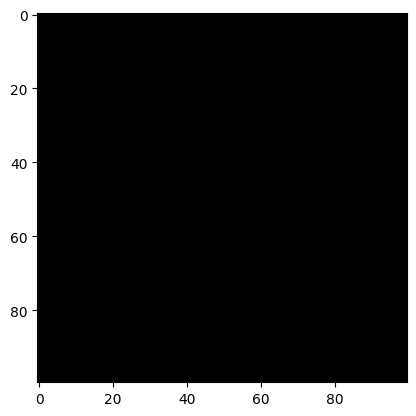

In [3]:
plt.imshow(img, cmap="gray")
plt.show()

OK, so we've got a pretty boring, black image. Let's change the central pixels to a value of 255 (for example a 20x20 square of pixels).

Then, display the image again.

Note that, when plotting an image, should you want to remove the axes you can use 
`plt.axis("off")`, try it now!

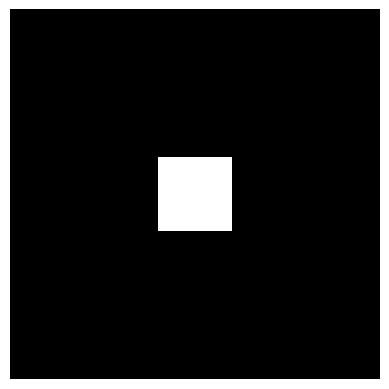

In [4]:
img[40:60, 40:60] = 255

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

### Exercise 1

Using a similar approach, generate and display the following image, going from a value of 0 at the top to a value of 100 at the bottom, in steps of 10.

<details>
    <summary style="cursor: pointer;">Click here to reveal a hint.</summary>
    Using a for loop and the range function will make this very easy! 
</details>

![](exercise1.png)

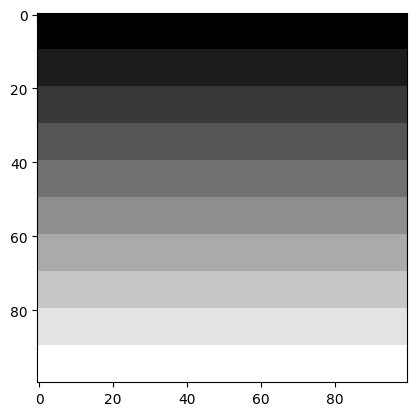

In [5]:
img = np.zeros((100, 100), dtype=np.uint8)

for row in range(0, 100, 10):
        img[row:row+10] = row

plt.imshow(img, cmap="gray")
plt.show()

Once we have an image inside a matrix we can easily save it to file using the `imsave` function (from `skimage.io`).
Try saving the image you just created to the "stripes.png" file.

<hr />

*Important note*: the `imread` and `imsave` functions are available both in `matplotlib.pyplot` and in `skimage.io`. While they share the same syntax, they are not quite equivalent.

The differences are especially annoying when it comes to reading and saving images. In general, for scientific images I would recommend using the Scikit Image functions, as their behaviour makes more sense, especially for microscopy images. As a rule of thumb, after you read an image, use the print function to check the image content and try to display it to make sure it is what you expect.

In [6]:
import skimage.io as io
io.imsave(arr=img, fname="stripes.png")

You can now try and read the image back into a new variable, display and (visually) check that the whole process actually worked!

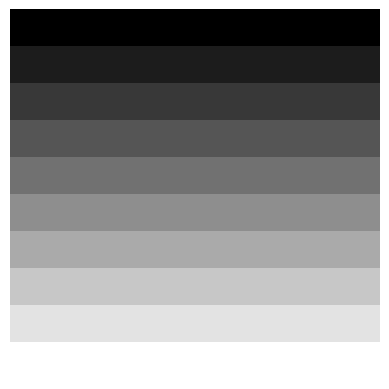

In [7]:
img_2 = plt.imread("stripes.png")
plt.imshow(img_2, cmap="gray")
plt.axis("off")
plt.show()

## Data types

It is important, at this point, to note that **some** Scikit Image functions will store images as floating point numbers (floats) between [0; 1] or [-1; 1].
While this is very handy in certain cases, it might cause some bizarre behaviour in other situations, so it is always good to check what your image looks like by looking at its `dtype`. An 8-bit image should have a `uint8` (unsigned integer, 8 bit) data type.

Scikit Image has a series of functions to convert images between different types:

- `img_as_ubyte` -> converts image to 8 bit (between 0 and 255)
- `img_as_float` -> converts image to float (between 0 and 1 if converting from unsigned integer, between -1 and 1 if converting from signed)
- `img_as_int` and `img_as_uint`  -> convert to 16 bit signed or unsigned integer (-32768 to 32768 or 0 to 65535 respectively)

Now try to convert the image to float and then back to unsigned integer.

Print the `dtype` and a few values of the image and compare what you get. Did the conversion work as you expected?

In [8]:
from skimage import img_as_ubyte, img_as_float
from skimage.io import imread

img_float = img_as_float(img)
img_uint = img_as_ubyte(img_float)

# Print data types
print(f"img is of type {img.dtype}")
print(f"img_float is of type {img_float.dtype}")
print(f"img_uint is of type {img_uint.dtype}")

# Print image values
print("Content of img:")
print(img)
print("Content of img_float:")
print(img_float)
print("Content of img_uint:")
print(img_uint)

img is of type uint8
img_float is of type float64
img_uint is of type uint8
Content of img:
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [90 90 90 ... 90 90 90]
 [90 90 90 ... 90 90 90]
 [90 90 90 ... 90 90 90]]
Content of img_float:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.35294118 0.35294118 0.35294118 ... 0.35294118 0.35294118 0.35294118]
 [0.35294118 0.35294118 0.35294118 ... 0.35294118 0.35294118 0.35294118]
 [0.35294118 0.35294118 0.35294118 ... 0.35294118 0.35294118 0.35294118]]
Content of img_uint:
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [90 90 90 ... 90 90 90]
 [90 90 90 ... 90 90 90]
 [90 90 90 ... 90 90 90]]


### Exercise 2 - *Some fun with colourmapping.*

Create a figure with a 3x3 grid of plots showing your image with nine different colourmaps. You might want to note how different colourmaps give different impressions of the image.

Look at the [Matplotlib page on colourmaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) to see a list of the available colourmaps. Alternatively you could use the `plt.colormaps()` function to get a list of all available colourmaps.

<details>
    <summary style="cursor: pointer;">Here are a few hints to get you going!</summary>
    <ul>
    <li>Use the `subplots` function to create a grid of plots</li>
    <li>Note that subplots will return the axes as a 3x3 matrix, so you will have to access them as <code>ax[0,0]</code>, <code>ax[0,1]</code> and so on</li>
    <li>A better way to do this is to put the names of the colourmaps in an array, then use a loop (e.g. with <code>enumerate</code>) to traverse the axes.
    Note that, in order to do that, you will need to <em>flatten</em> the axes matrix using <code>ax.flat</code>, for example <code>for i,a in enumerate(ax.flat):</code></li>
    </ul>  
</details>

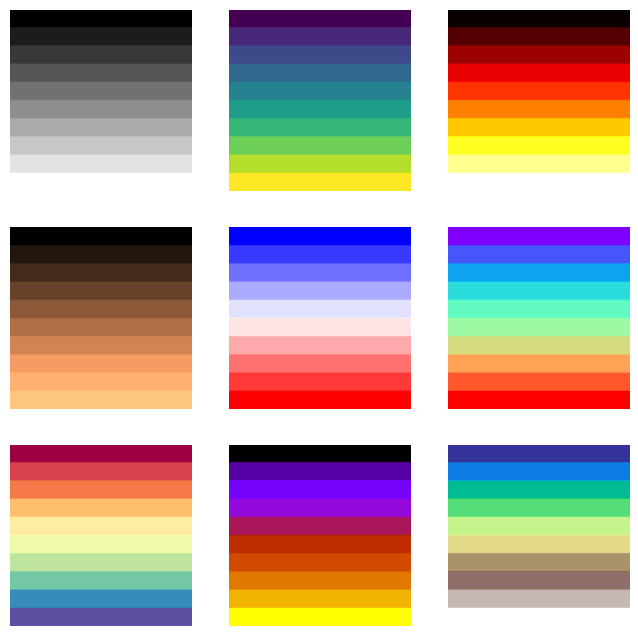

In [9]:
fig, ax = plt.subplots(3,3, figsize=(8, 8))

cmaps = ["gray", "viridis", "hot", "copper", "bwr", "rainbow", "Spectral", "gnuplot", "terrain"]

# Note enumerate returns both the object and the loop index!
for i,a in enumerate(ax.flat): 
    a.imshow(img, cmap=cmaps[i])
    a.axis("off")

plt.show()

## Cropping images

We will now practice cropping some images.

Start by loading the nucleoli.png image and display it. This is an immunofluorescence showing nucleoli of HEp-20-10 human epitelial cells (Simon Caulton - [CC-BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/)).

**What are the image dimensions?**

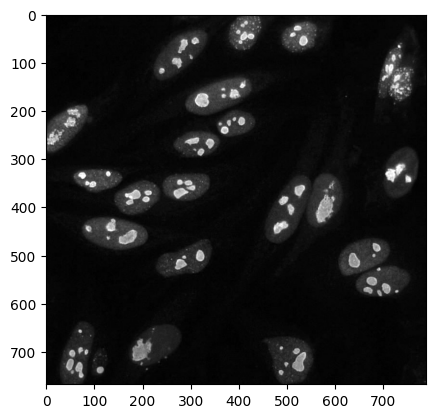

(768, 789)


In [10]:
nucleoli = imread("nucleoli.png")
plt.imshow(nucleoli, cmap="gray")
plt.show()
print(nucleoli.shape)

Crop the image to only display the two nuclei on the bottom right corner (it might take a bit of trial and error to get the correct coordinates...). Display the cropped image.

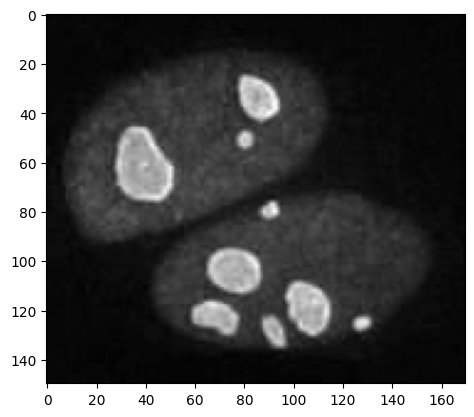

In [11]:
nucleoli_cropped = nucleoli[450:600, 600:770]
plt.imshow(nucleoli_cropped, cmap="gray")
plt.show()

Now, load the langat.jpg image, which contains a confocal image of cells infected with Langat virus (National Institute of Allergy and Infectious Diseases (NIAID) [CC-BY-2.0](https://creativecommons.org/licenses/by/2.0/)).

**Examine the shape of the image, what does that tell you?**

(1613, 1613, 3)


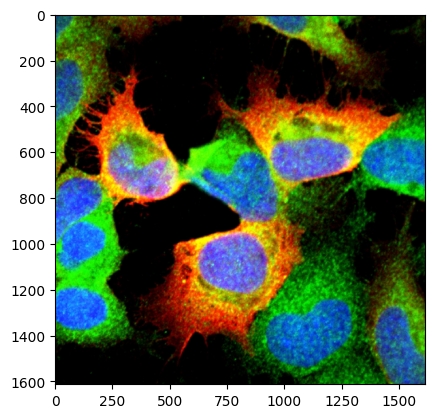

In [12]:
langat = imread("langat.jpg")
print(langat.shape)

plt.imshow(langat)
plt.show()

Create a 1x3 visualization of the three colour channels in the image.
Try setting the title of each subplot using the `set_title` function (e.g. ax.set_title("title of the panel")).
You can also use the `plt.suptitle` function to set a title for the whole figure.

<details>
    <summary style="cursor: pointer;">Click for a hint.</summary>
    In this case we have a three-dimensional matrix. This is really a case of "cropping" the image in each colour channel, and displaying each channel using `imshow`.    
</details>

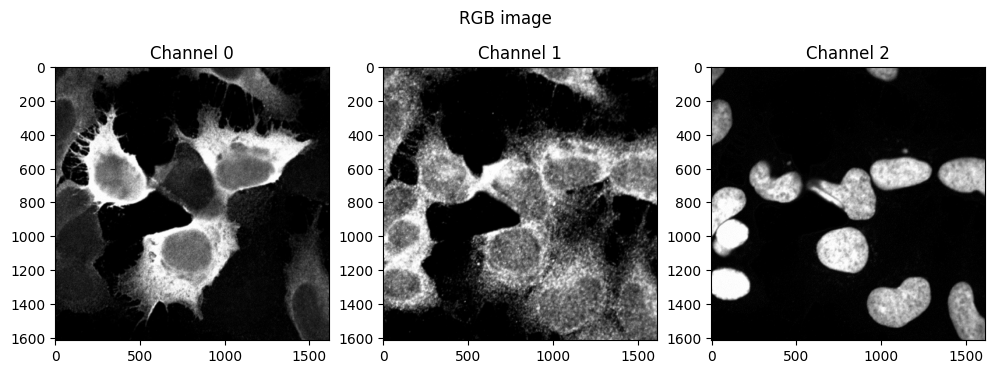

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

plt.suptitle("RGB image")
for i, a in enumerate(ax):
    a.imshow(langat[:,:,i], cmap="gray")
    a.set_title(f"Channel {i}")

plt.show()

Now, crop the image so to only visualize channel 2 of a single cell of your choice

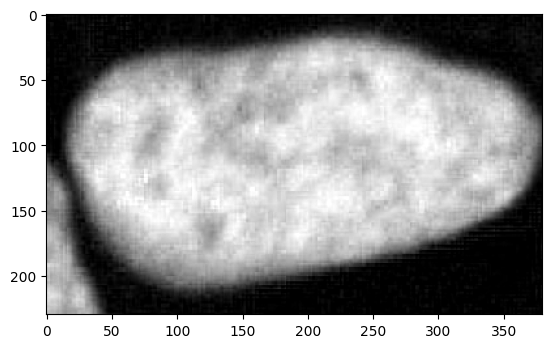

In [14]:
langat_cropped = langat[520:750, 920:1300, 2]

plt.imshow(langat_cropped, cmap="gray")
plt.show()

### Exercise 3 - 3D images

The pituitary_stack.tif image contains a 3D confocal stack of a pituitary slice (Nicola Romanò - [CC-BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/))

Load the image, look at its shape and visualize every 3rd slice


(18, 627, 800)


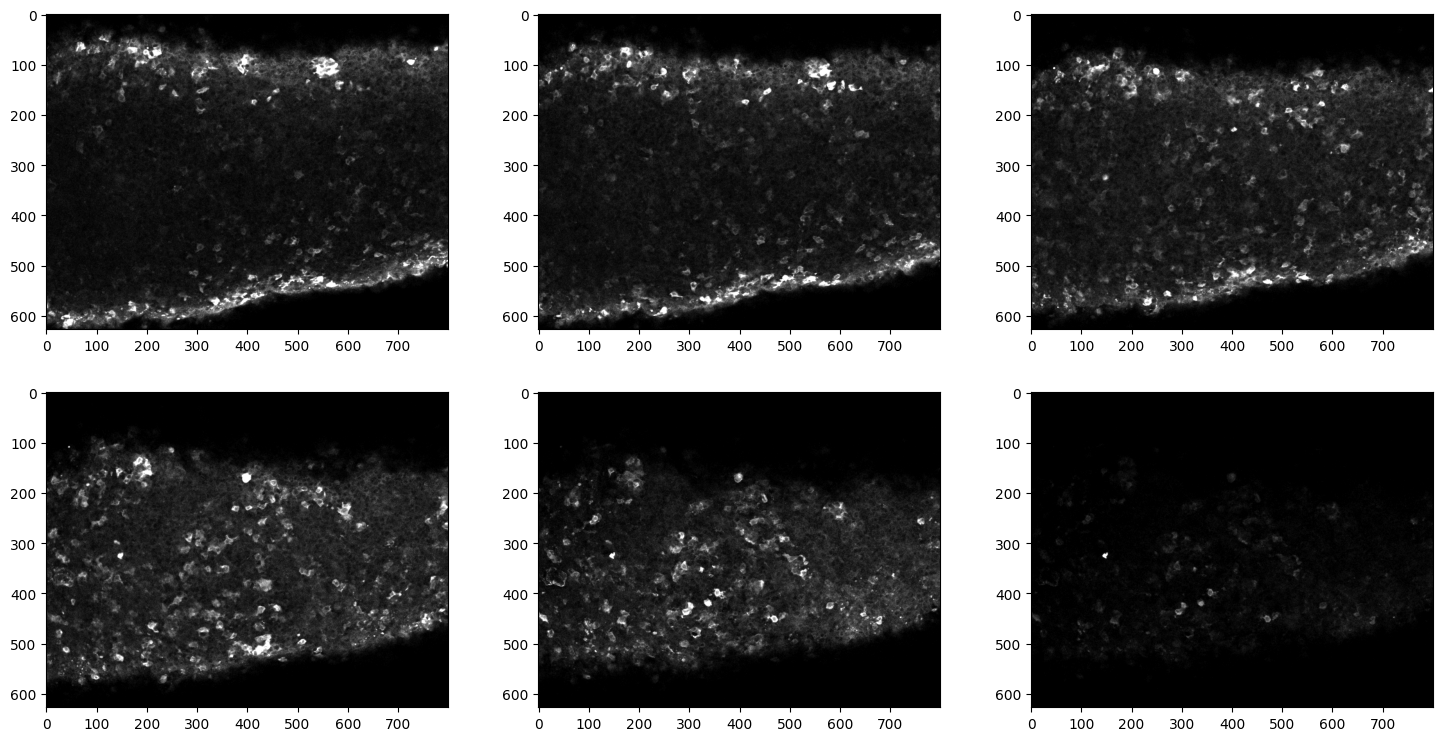

In [25]:
pit = imread("pituitary_stack.tif")

print(pit.shape)

fig, ax = plt.subplots(2, 3, figsize=(18,9))
axes = ax.flat

for i, slice in enumerate(range(0, 18, 3)):
    axes[i].imshow(pit[slice], cmap="gray")    

A different way of showing 3D images is that of creating a new image, where each pixels has the maximum intensity of all pixels at that position in the stack.

This is called a **maximum intensity projection** or MIP.

The `max` function in Numpy makes it supereasy to create MIPs. You can use the `axis` parameter to project along different axes.

Try it below and compare to the images above.

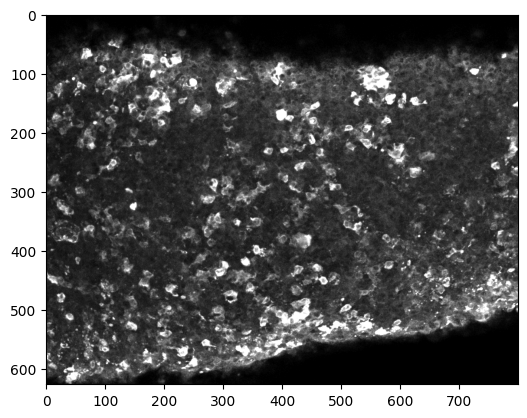

In [16]:
plt.imshow(np.max(pit, axis=0), cmap="gray")
plt.show()

Now create a MIP for the XZ and YZ planes.
Because of the large number of cells, these projections will probably be difficult to understand. Performing them on crops of the original image might help.

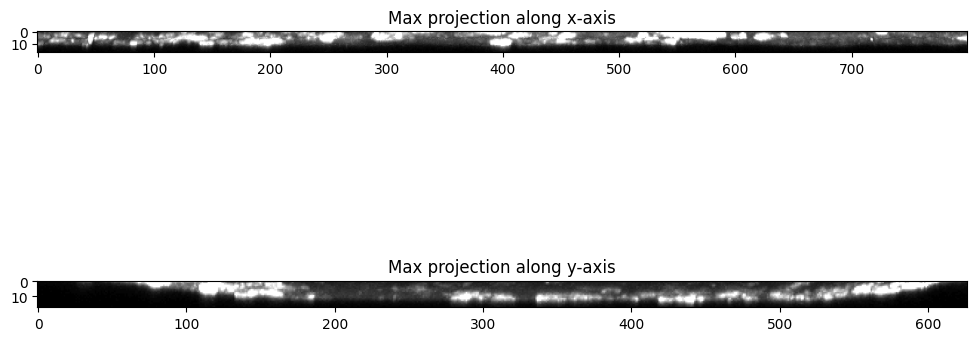

In [39]:
fig, ax = plt.subplots(2, 1, figsize = (12,6))

ax[0].imshow(np.max(pit[:, 100:200,:], axis=1),cmap="gray")
ax[1].imshow(np.max(pit[:, :, 200:300], axis=2),cmap="gray")
ax[0].set_title("Max projection along x-axis")
ax[1].set_title("Max projection along y-axis")
plt.show()

There are more advanced ways of displaying 3D images. One that you might want to explore is Napari. This is a fast, interactive, multi-dimensional image viewer for Python. It’s designed for browsing, annotating, and analyzing large multi-dimensional images.

[The Napari website](https://napari.org/tutorials/) has lots of interesting tutorials, which you can explore in your own time, if you are interested in 3D visualizations.

## Affine transformations

In lecture 2, we talked about affine transformations and how they can be used to manipulate images.

Given the nucleoli image from above, try to scale it using the `rescale` function from `skimage` to:

1. 1/10 of its resolution
2. twice in x and three times in y

Display the results.

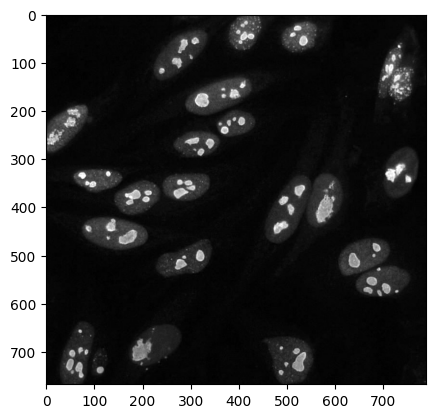

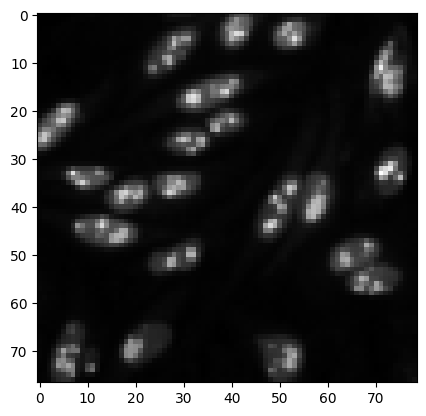

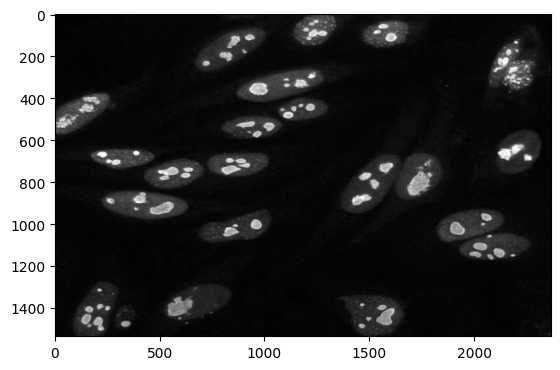

In [18]:
from skimage.transform import rescale

plt.imshow(nucleoli, "gray")
plt.show()

plt.imshow(rescale(nucleoli, 0.1), "gray")
plt.show()

plt.imshow(rescale(nucleoli, (2,3)), "gray")
plt.show()


Visually compare the results of different orders of interpolation when downscaling to twice the resolution (it might be difficult to see an appreciable difference, unless you "zoom in" on a detail of the image, by displaying a crop).

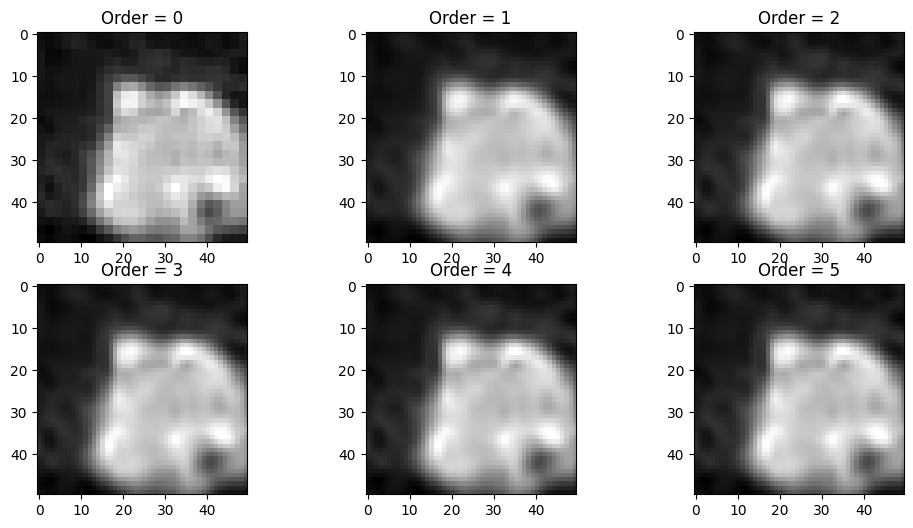

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(12,6))

for i, a in enumerate(ax.flat):
    nucleoli_big = rescale(nucleoli, 2, order=i)
    a.imshow(nucleoli_big[300:350, 750:800], cmap="gray")
    a.set_title(f"Order = {i}")

plt.show()

Reload your stripes.png picture and use the skimage `rotate` function to rotate it by 30, 45 or 90 degrees.

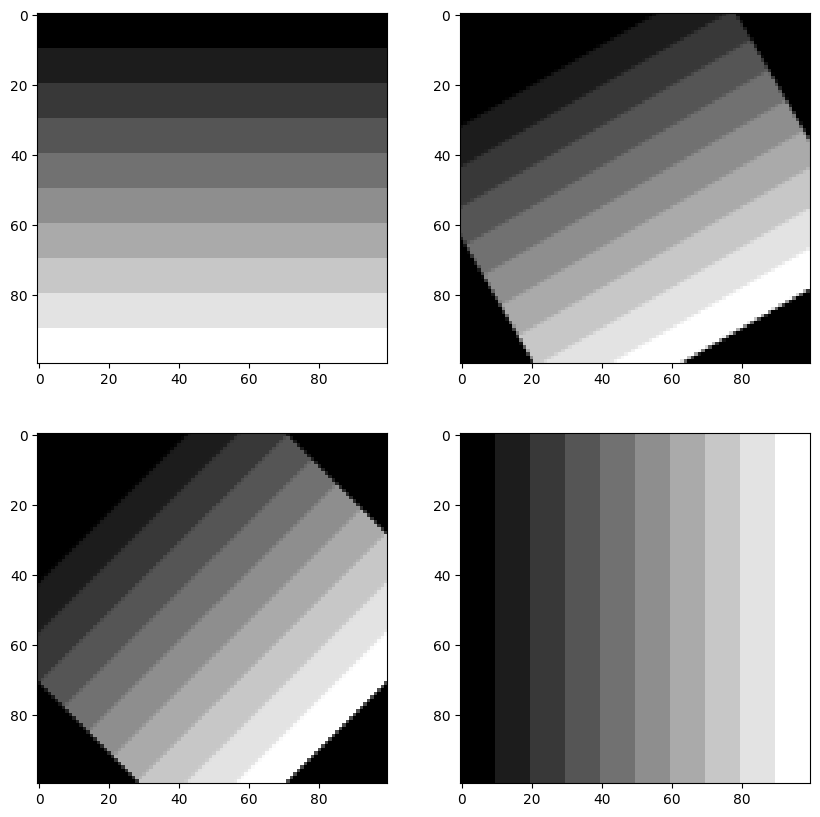

In [20]:
from skimage.transform import rotate

stripes = imread("stripes.png")

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0,0].imshow(stripes, cmap="gray")
ax[0,1].imshow(rotate(stripes, 30), cmap="gray")
ax[1,0].imshow(rotate(stripes, 45), cmap="gray")
ax[1,1].imshow(rotate(stripes, 90), cmap="gray")

plt.show()

We learned in the lecture that the `rotate` function performs matrix multiplication to rotate the points. 

**Can you think of another way of rotating the image by 90 degrees?**

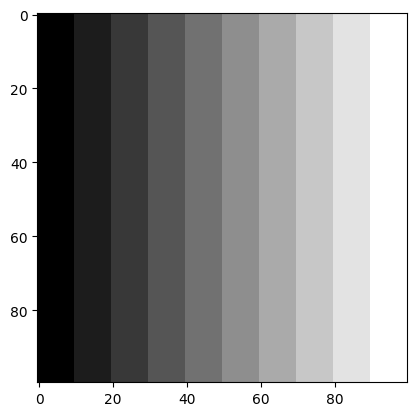

In [21]:
plt.imshow(np.transpose(stripes), cmap="gray")
plt.show()

Similarly to what you have done above, see what the effect of different types of interpolation is on the results of a 30 degrees rotation using `rotate` (set the `order` parameter as you did above).

You can crop the image to see the effect more in detail

/home/nico/Data/Teaching/BIA4/BIA4/Workshops/workshops_env/lib64/python3.12/site-packages/skimage/transform/_warps.py:444: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  return warp(


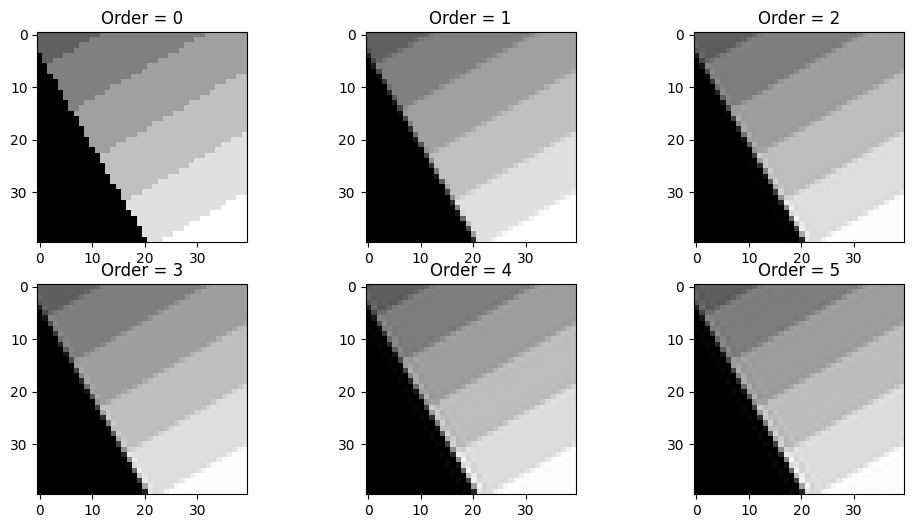

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(12,6))

for i, a in enumerate(ax.flat):
    stripes_rotated = rotate(stripes, 30, order=i)
    a.imshow(stripes_rotated[60:100, 0:40], cmap="gray")
    a.set_title(f"Order = {i}")

plt.show()

Finally, let's try building our own transformation matrix.

- Use `SimilarityTransform` to create a matrix that rotates an image by 20 degrees and translates it 10 pixels to the left and 10 to the bottom
- Note that `SimilarityTransform` expects the angle to be in radians. You can convert degrees into radians using `np.deg2rad(angle)`
- Use what you learnt in the lectures to predict what the value of such matrix would be. Check it by printing the matrix.
- Apply the matrix to the stripes image using the `warp` function.


<SimilarityTransform(matrix=
    [[  0.93969262,  -0.34202014, -10.        ],
     [  0.34202014,   0.93969262, -10.        ],
     [  0.        ,   0.        ,   1.        ]])>


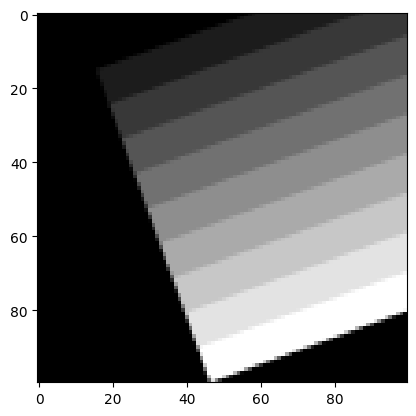

In [23]:
from skimage.transform import SimilarityTransform, warp

matrix = SimilarityTransform(rotation=np.deg2rad(20), translation=(-10, -10))

print(matrix)

stripes_transformed = warp(stripes, matrix)
plt.imshow(stripes_transformed, cmap="gray")
plt.show()

### You made it to the end! Well done!